# Test PDPbox with multiclass classification problem
## Kaggle Otto Group
This demo is based on **Otto Group Product Classification Challenge**  
https://www.kaggle.com/c/otto-group-product-classification-challenge

In [1]:
import pandas as pd
#import xgboost as xgb
import numpy as np

%matplotlib inline

### read training set

In [2]:
otto_raw = pd.read_csv('otto_train.csv')

In [3]:
otto_raw.head()

id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

    ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0   ...           1        0        0        0        0        0        0   
1   ...           0        0        0        0        0        0        0   
2   ...           0        0        0        0        0        0        0   
3   ...           0        1        2        0        0        0        0   
4   ...           1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0        0  Class_1  
2        0        0  Class_1  
3        0        0  Class_1  
4        0        0  Class_1  

[5 rows x 95 columns]

In [4]:
otto_raw['target'] = otto_raw['target'].apply(lambda x : int(x.split('_')[1])-1)
otto_train = otto_raw.drop(['id', 'target'], axis=1)

## First test XGBoost
### create model

In [ ]:
clf = xgb.XGBClassifier(objective='multi:softprob', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100, nthread=4)
%time clf.fit(otto_train, otto_raw['target'])

# start testing PDPbox

In [5]:
from pdpbox import pdp

### add target plot for feat_67

### first dummy the multiple targets

In [6]:
target_dummies = pd.get_dummies(otto_raw['target'], prefix='target')
otto_raw = pd.concat([otto_raw, target_dummies], axis=1)

### choose one target

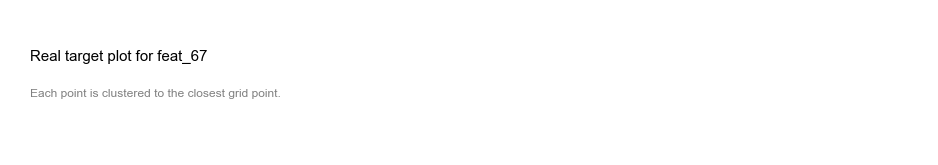

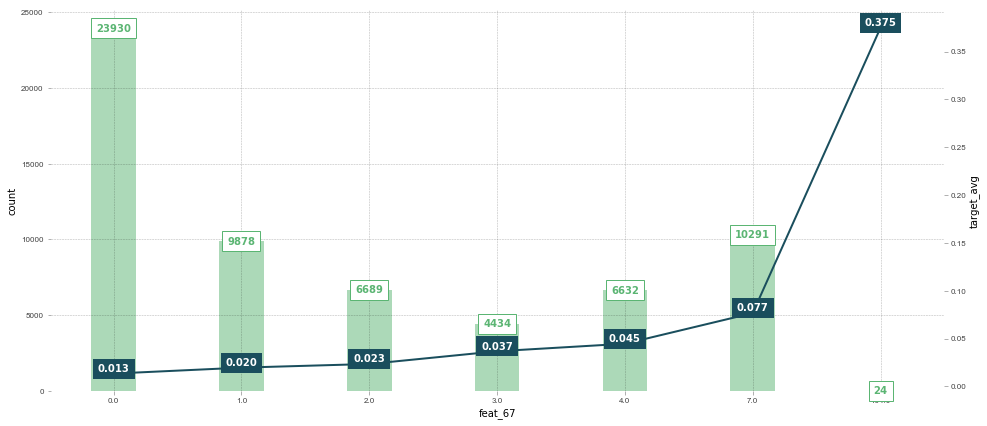

In [7]:
pdp.target_plot(otto_raw, 'feat_67', 'feat_67', 'target_0')

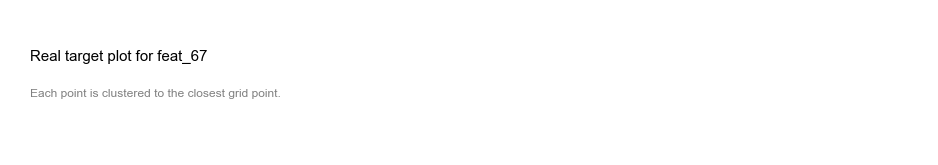

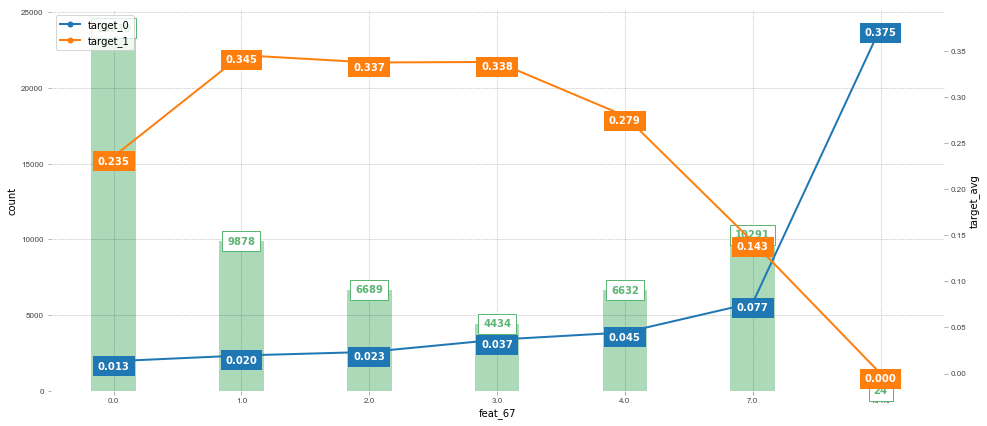

In [8]:
pdp.target_plot(otto_raw, 'feat_67', 'feat_67', ['target_0', 'target_1'])

#### since this dataset only have numeric features..
For multiclass classification problem, each class would have a corresponding plot.

In [ ]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3)

In [ ]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, x_quantile=True, ncols=3, plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

#### try to plot out the actual predictions

In [ ]:
pdp.actual_plot(pdp_feat_67, 'feat_67')

In [ ]:
pdp.actual_plot(pdp_feat_67, 'feat_67', multi_flag=True, which_class=2)

#### you can also set multi_flag=True, which_class=(the class you want to check)

In [11]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True)

#### do clustering

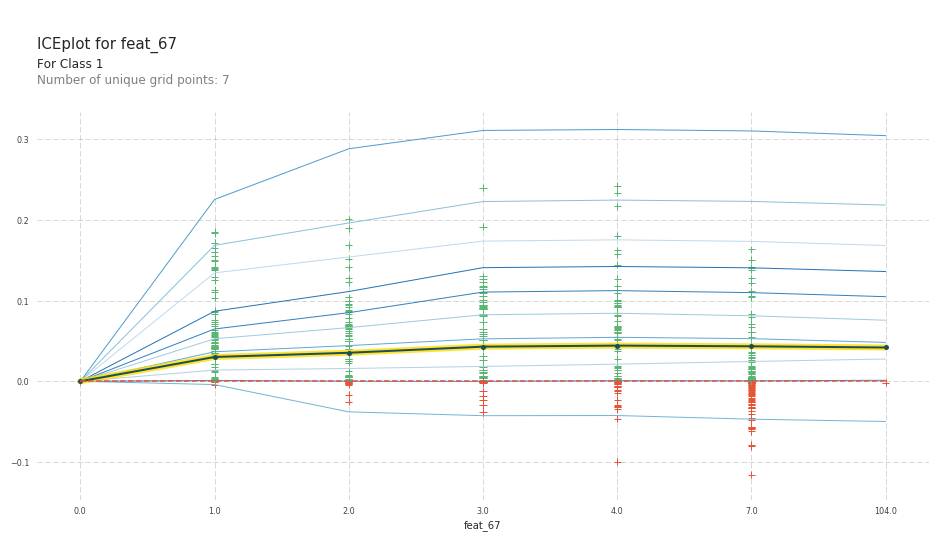

In [12]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=1, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to customize percentile range

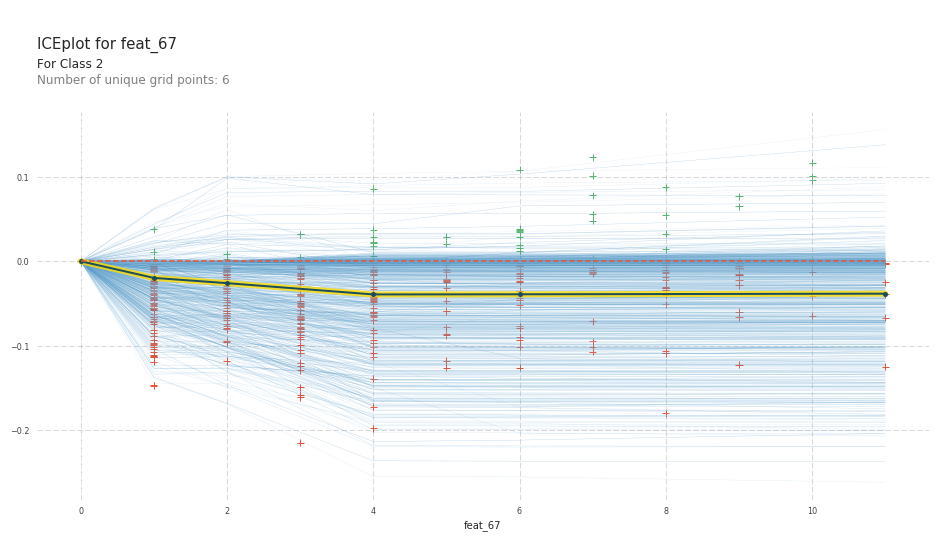

In [14]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67', percentile_range=(5, 95))
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000)

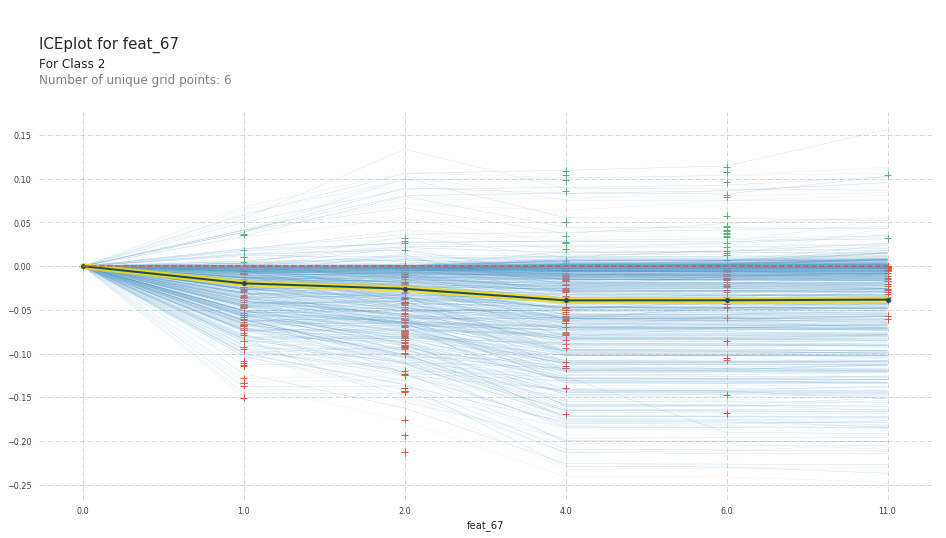

In [15]:
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000, x_quantile=True)

#### try to customized the grid points

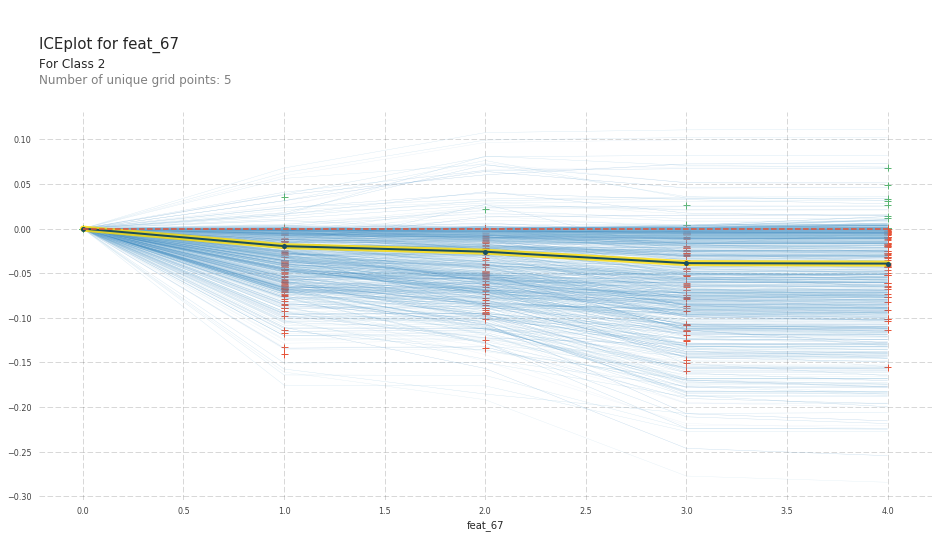

In [16]:
pdp_feat_67 = pdp.pdp_isolate(clf, otto_train, 'feat_67', cust_grid_points=range(5))
pdp.pdp_plot(pdp_feat_67, 'feat_67', center=True, multi_flag=True, which_class=2, plot_org_pts=True, 
             plot_lines=True, frac_to_plot=1000)

## test interaction

In [17]:
pdp_67_24 = pdp.pdp_interact(clf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10])

#### only plot for class 5

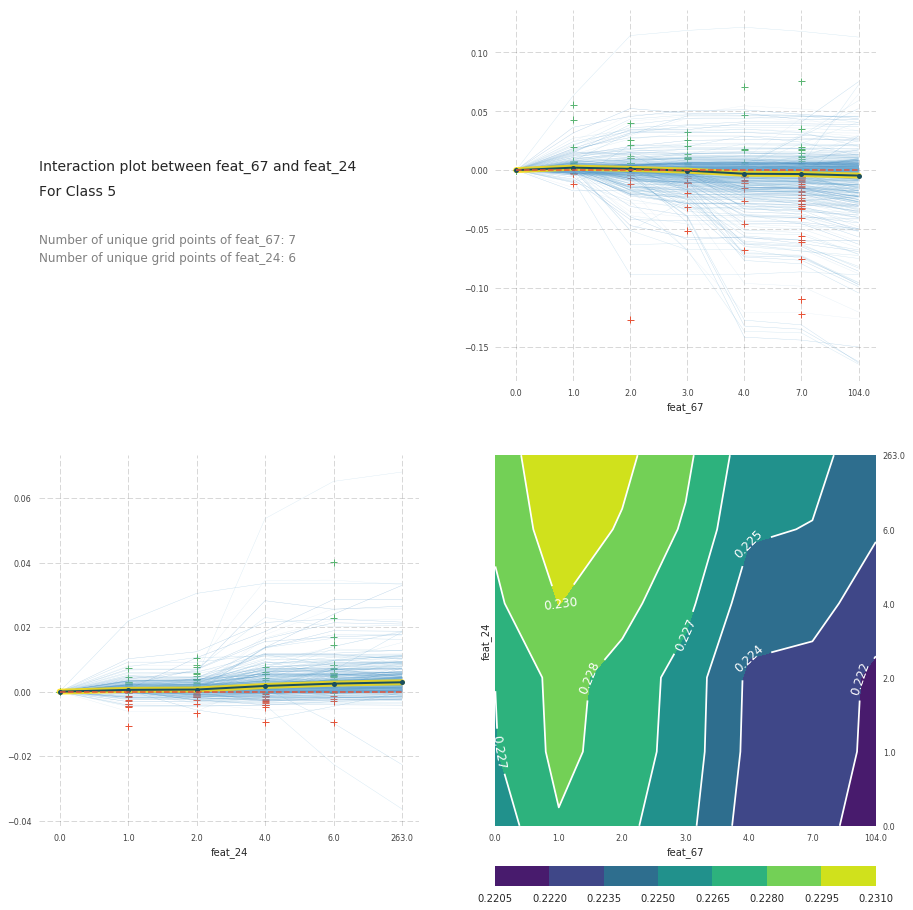

In [18]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)

#### only plot out the contour plot

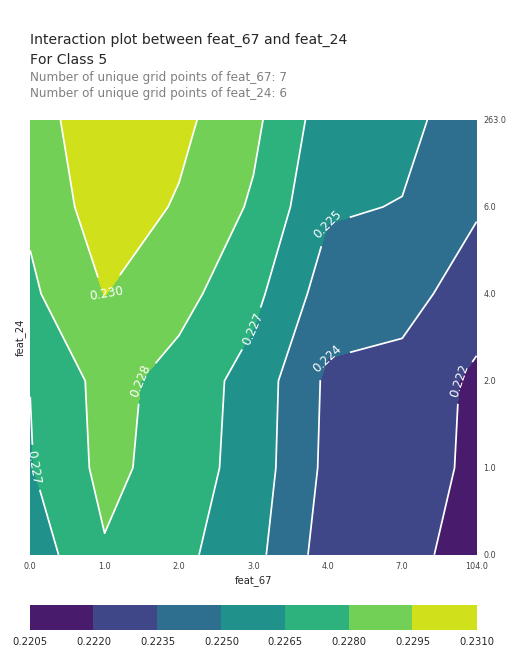

In [19]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True, only_inter=True)

#### plot out for all classes

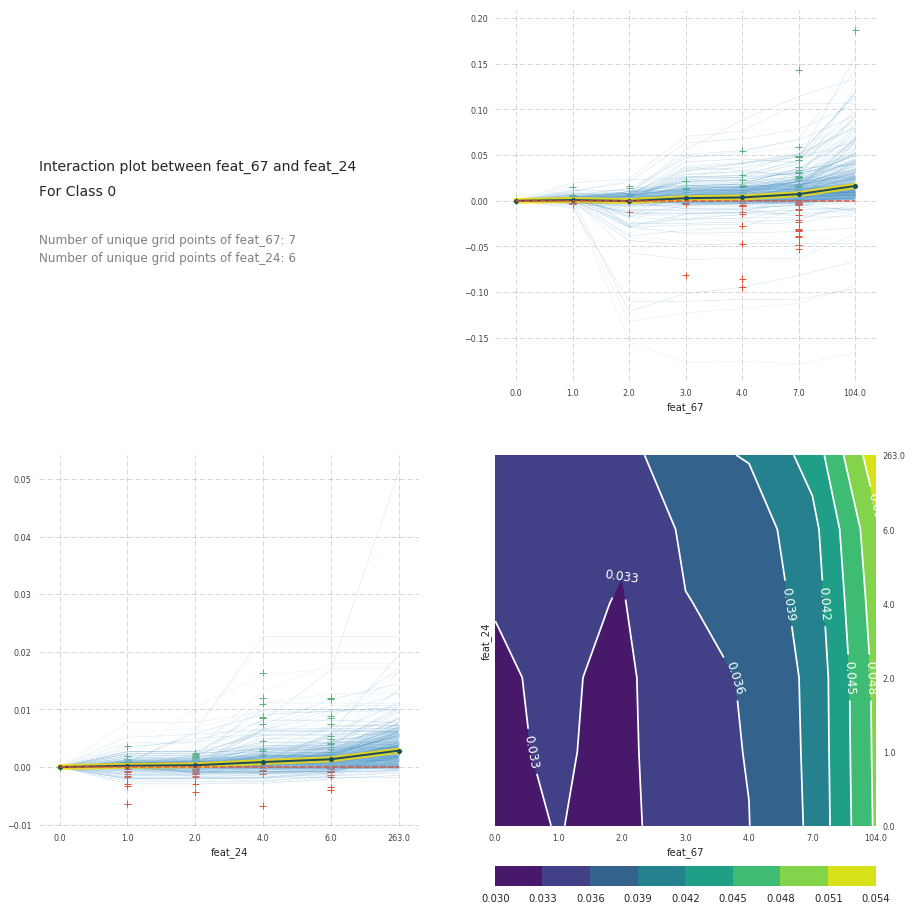

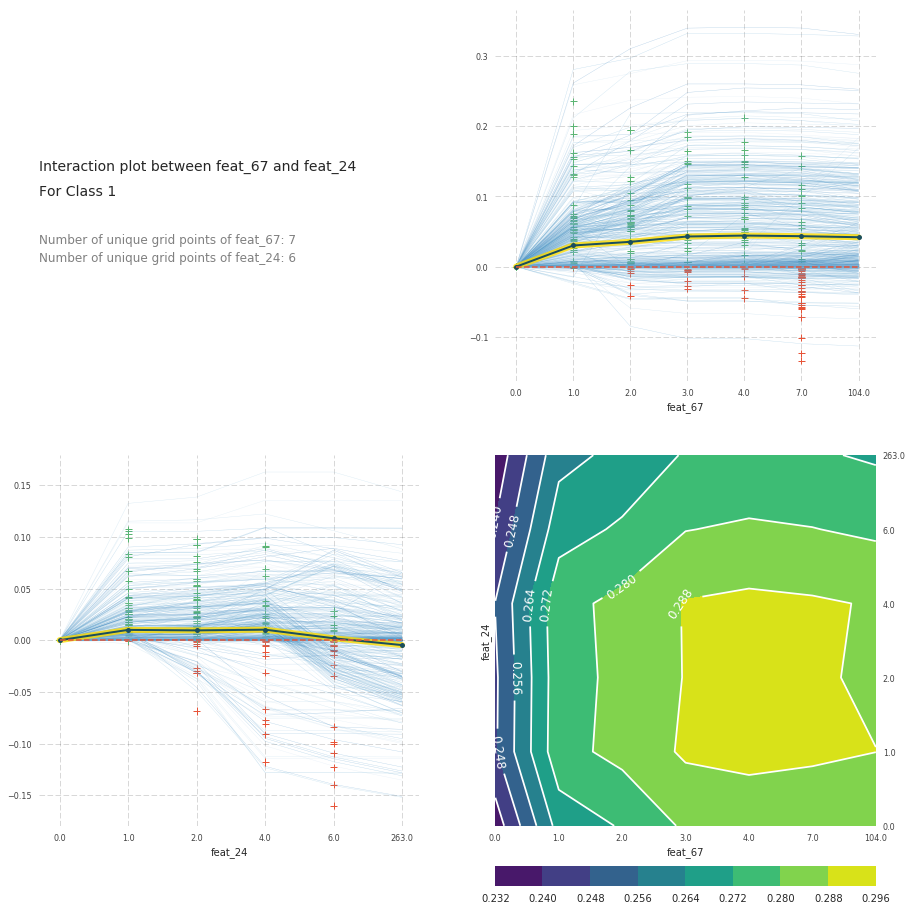

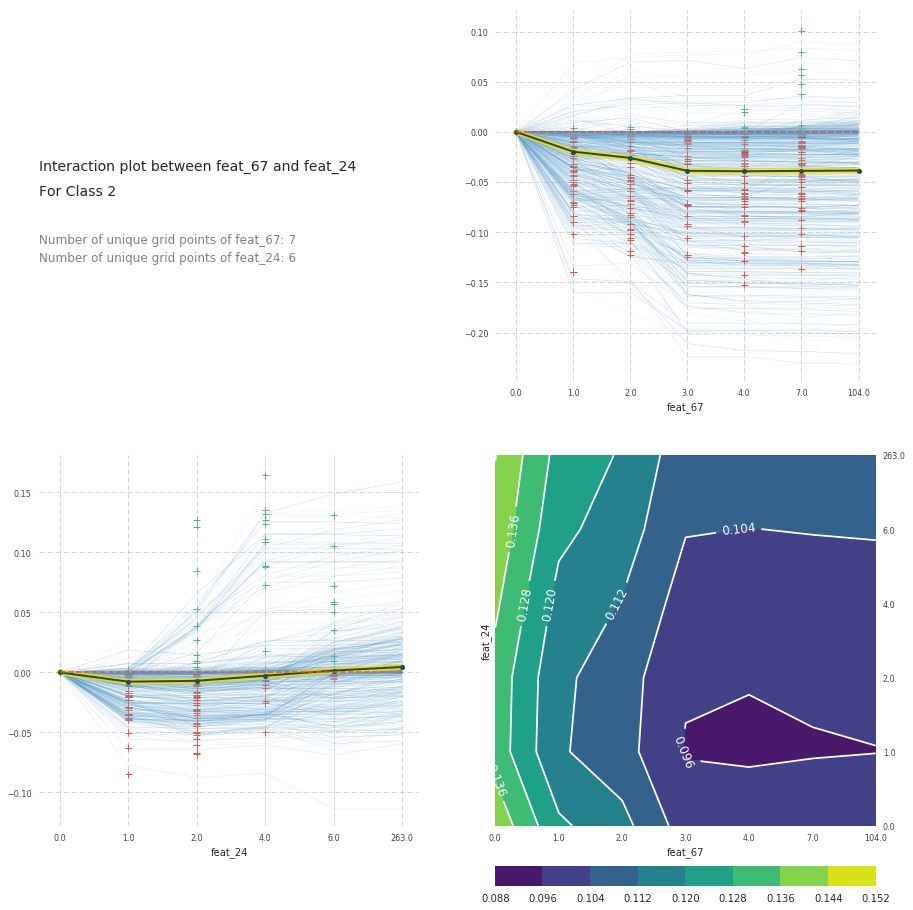

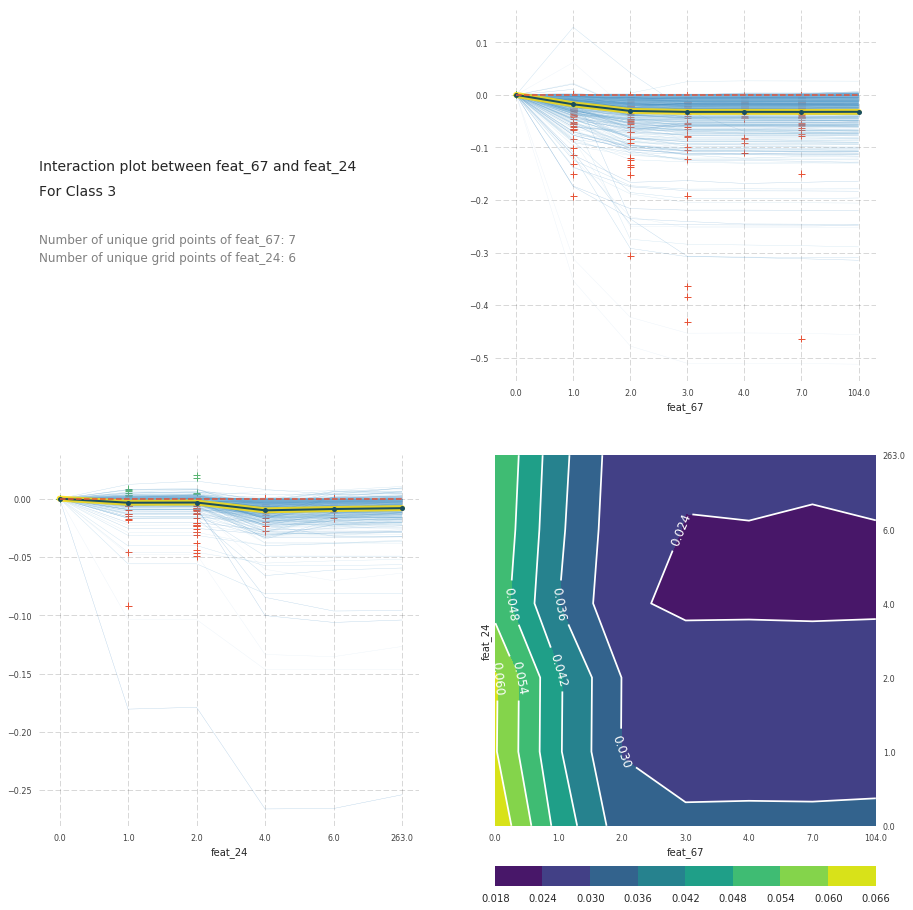

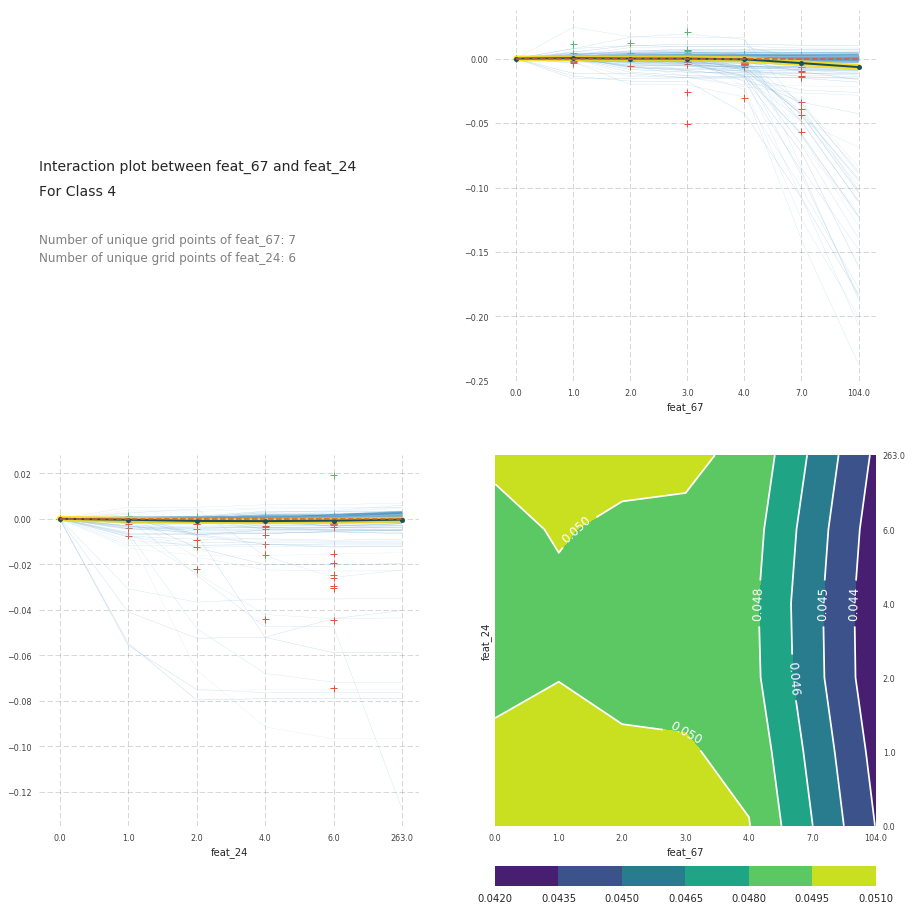

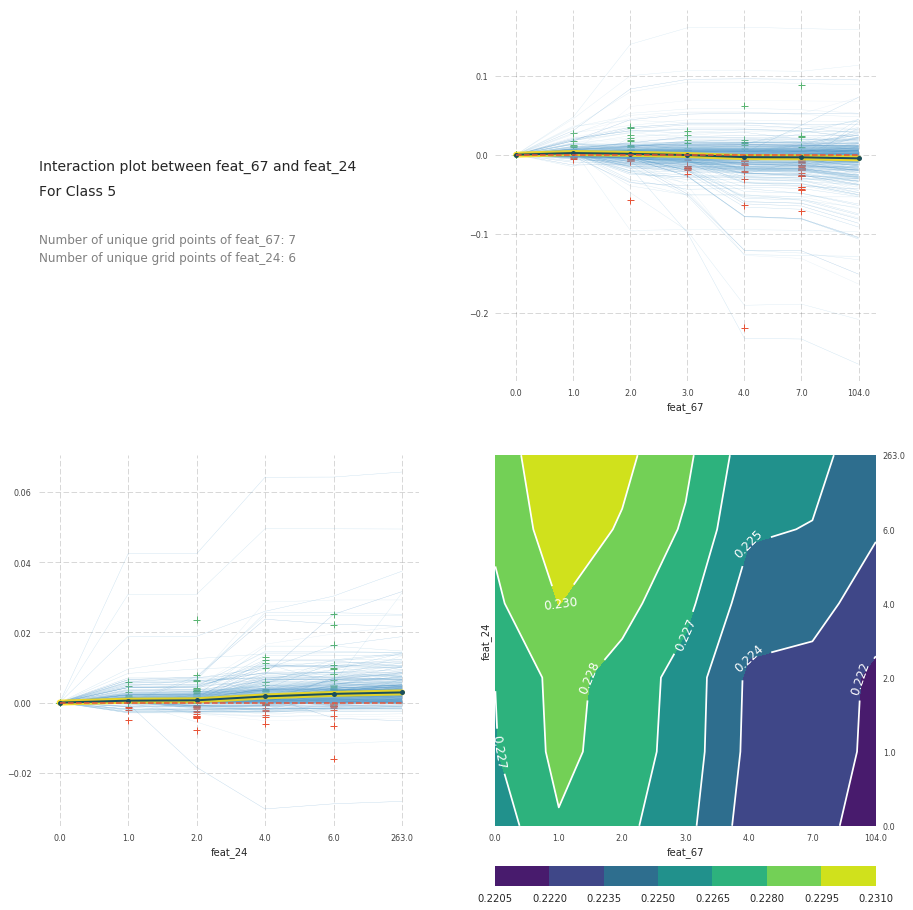

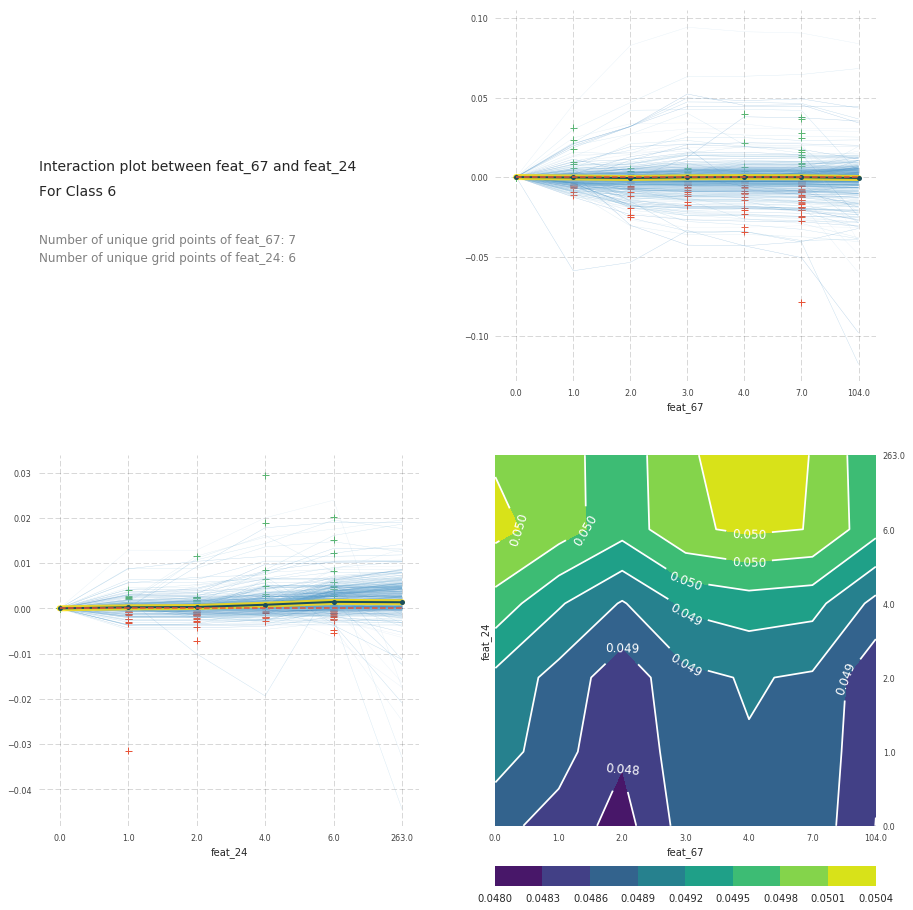

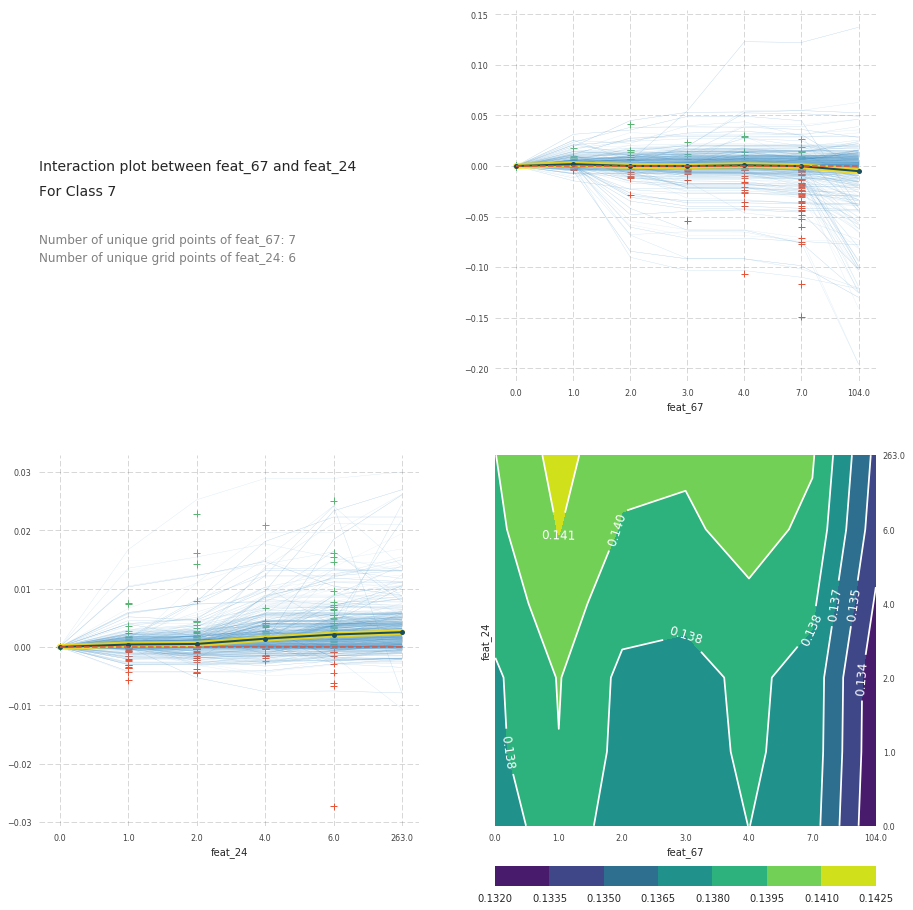

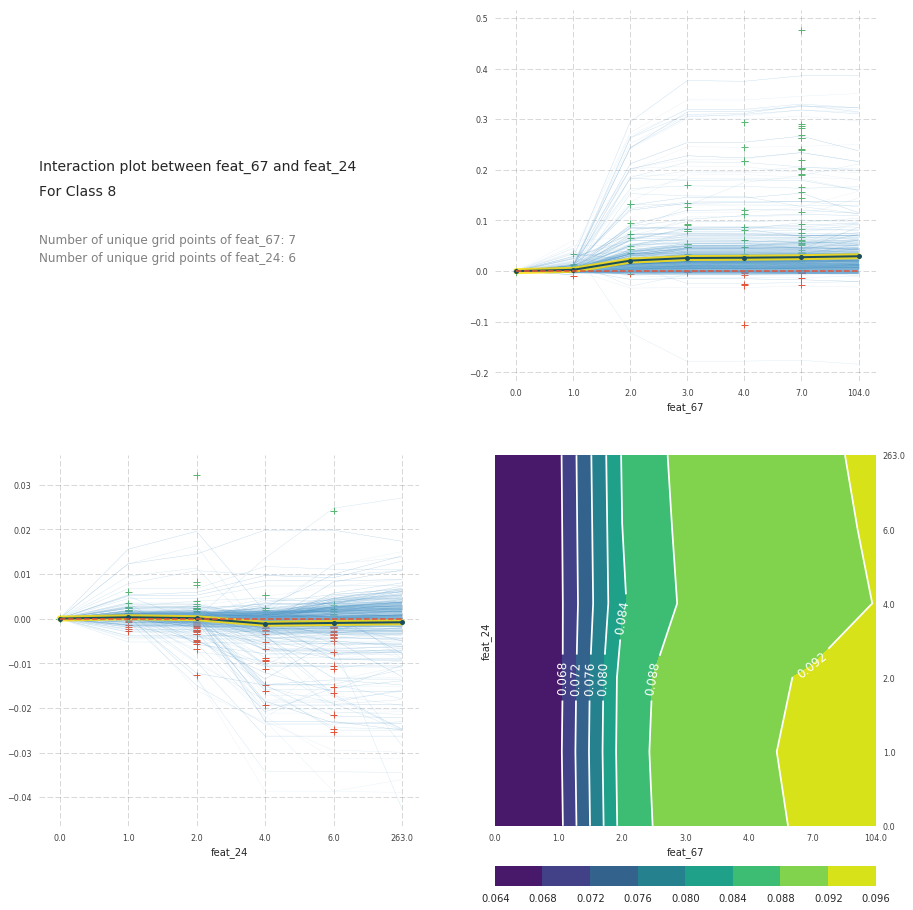

In [20]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.01, x_quantile=True)

#### only plot out contours for all classes

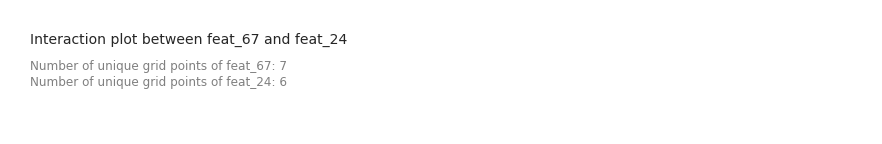

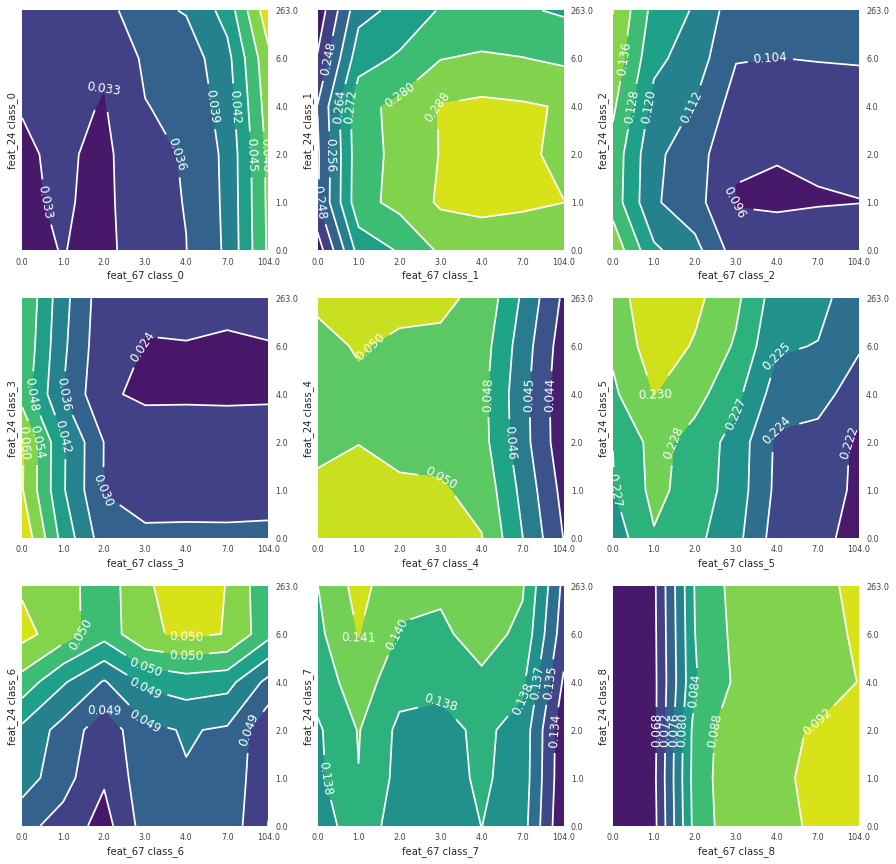

In [21]:
pdp.pdp_interact_plot(pdp_67_24, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
                      frac_to_plot=0.01, multi_flag=False, which_class=5, x_quantile=True, only_inter=True, ncols=3)

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_features=50, n_jobs=4, random_state=24)
%time rf.fit(otto_train, otto_raw['target'])

CPU times: user 53.1 s, sys: 194 ms, total: 53.3 s
Wall time: 13.7 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=4, oob_score=False, random_state=24,
            verbose=0, warm_start=False)

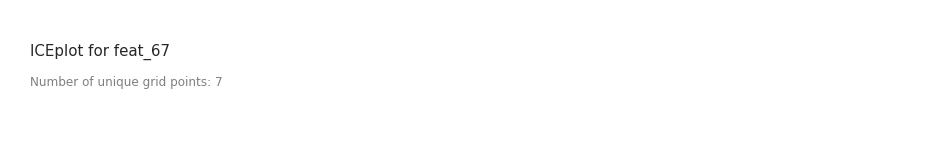

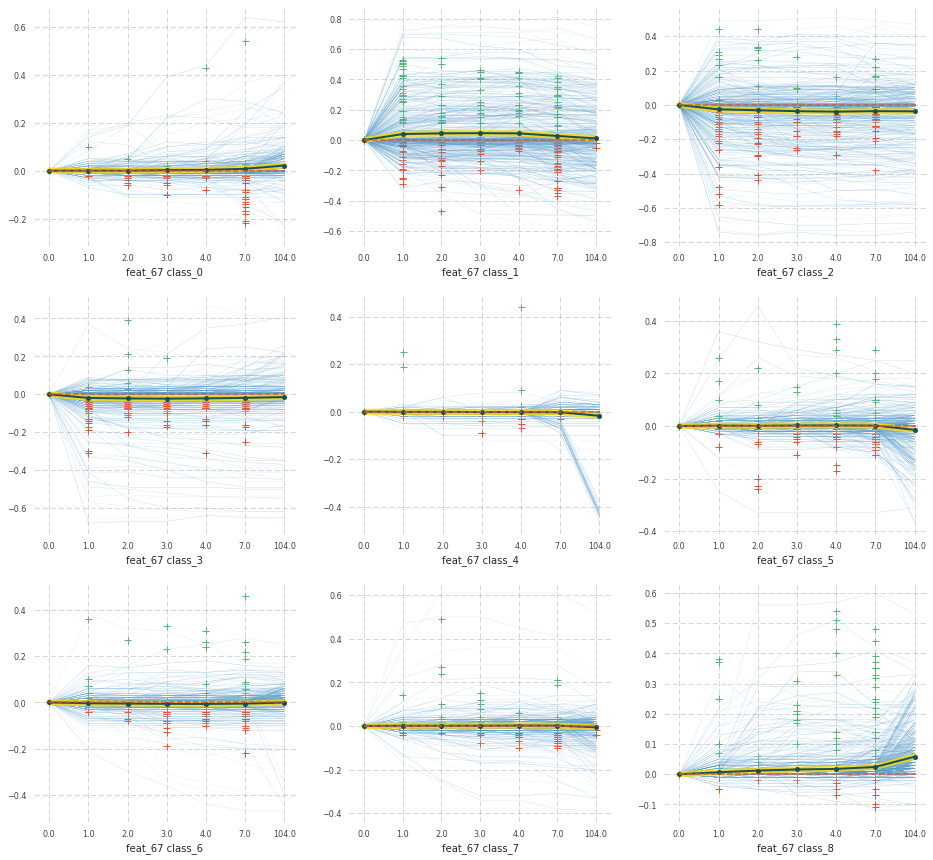

In [24]:
pdp_feat_67_rf = pdp.pdp_isolate(rf, otto_train, 'feat_67')
pdp.pdp_plot(pdp_feat_67_rf, 'feat_67', center=True, x_quantile=True, ncols=3, 
             plot_org_pts=True, plot_lines=True, frac_to_plot=0.01)

### interaction between feat_67 and feat_24

In [25]:
pdp_67_24_rf = pdp.pdp_interact(rf, otto_train, ['feat_67', 'feat_24'], num_grid_points=[10, 10], 
                                percentile_ranges=[None, None])

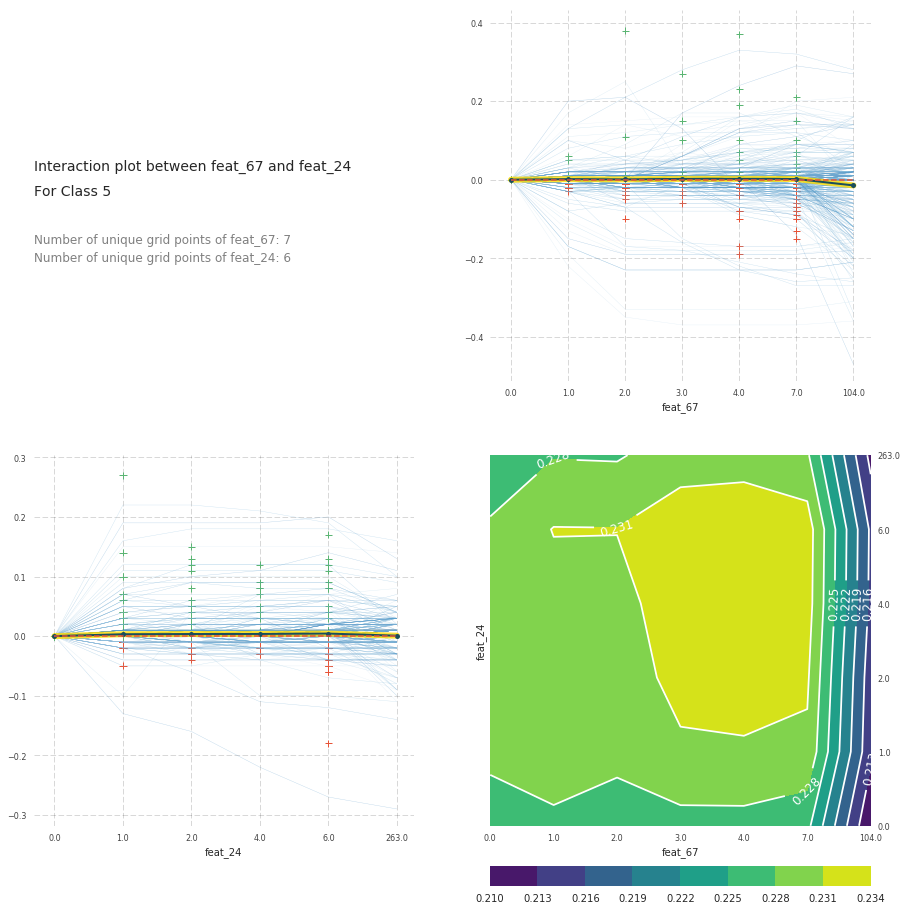

In [26]:
pdp.pdp_interact_plot(pdp_67_24_rf, ['feat_67', 'feat_24'], center=True, plot_org_pts=True, plot_lines=True, 
            frac_to_plot=0.01, multi_flag=True, which_class=5, x_quantile=True)